In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
iris = pd.read_excel('../../Data/Iris.xls')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
petalwidth = iris[['petalwidth']]
pentallength = iris['petallength']

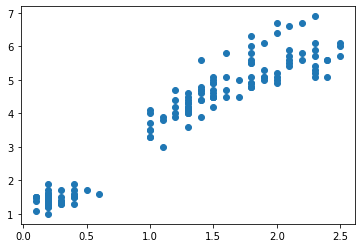

In [5]:
plt.scatter(petalwidth, pentallength)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(petalwidth, pentallength, test_size=0.20, random_state = 42)

In [7]:
# Create random forest resgressor object
rrf = RandomForestRegressor(n_estimators=100)
# Train model
model = rrf.fit(X_train, y_train)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([4.21678506, 1.35453333, 5.63288492, 4.68301985, 4.61046858,
       1.60054127, 4.19493727, 5.63288492, 4.68301985, 4.21678506,
       5.51189444, 1.40604494, 1.43276554, 1.40604494, 1.35453333,
       5.07070833, 6.21571667, 3.41245592, 4.19493727, 6.21571667,
       1.43276554, 5.34671543, 1.60054127, 5.81420126, 5.51189444,
       5.63288492, 5.34671543, 5.63288492, 1.35453333, 1.43276554])

In [9]:
# Score
print("The R^2 train score is: ", model.score(X_train, y_train))
print("The R^2 test score is: ", model.score(X_test,y_test))
# tinh them mse
print("MSE (in train): ", mean_squared_error(y_train, model.predict(X_train)))
print("MSE (in test): ", mean_squared_error(y_test, y_pred))

The R^2 train score is:  0.9640790032109938
The R^2 test score is:  0.9430083153632114
MSE (in train):  0.10924750039473403
MSE (in test):  0.1867839139876705


#### R^2 của cả train và test đều cao => model phù hợp với dữ liệu
#### MSE thấp

In [10]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,
                   'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,4.7,4.216785
1,1.7,1.354533
2,6.9,5.632885
3,4.5,4.683020
4,4.8,4.610469


In [11]:
x_now = [[0.25]]
y_now = model.predict(x_now)
y_now

array([1.43276554])